<a href="https://colab.research.google.com/github/omakson/colab_notebook/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
ttnc_train = pd.read_csv('/content/drive/MyDrive/train_titanic.csv')
ttnc_test = pd.read_csv('/content/drive/MyDrive/test_titanic.csv')
combine = [ttnc_train, ttnc_test]

In [ ]:
ttnc_train.info()
print('_'*40)
ttnc_test.info()

In [ ]:
ttnc_train.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [ ]:
ttnc_train.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [ ]:
ttnc_train.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

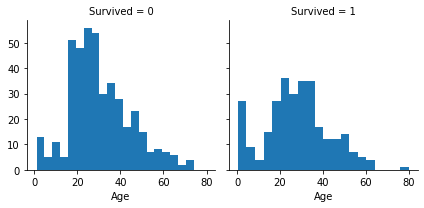

In [ ]:
g = sns.FacetGrid(ttnc_train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [ ]:
grp_Sex_train = ttnc_train.groupby(['Sex'])
ttnc_train['Age'] = grp_Sex_train.Age.apply(lambda x: x.fillna(x.median()))


In [ ]:
grp_Sex_test = ttnc_test.groupby(['Sex'])
ttnc_test['Age'] = grp_Sex_test.Age.apply(lambda x: x.fillna(x.median()))


In [ ]:
ttnc_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
ttnc_test['Fare'].fillna(ttnc_test['Fare'].dropna().median(), inplace=True)

In [ ]:
ttnc_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
for dataset in combine:
  dataset['Embarked'] = dataset['Embarked'].fillna('U')
  dataset['Embarked'] = dataset['Embarked'].map( {'U' : 0, 'S': 1, 'C': 2, 'Q': 3} ).astype(int)
##"U", "S", "C", "Q" на 0, 1, 2, 3 соответственно


In [ ]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [ ]:
print("Before", ttnc_train.shape, ttnc_test.shape, combine[0].shape, combine[1].shape)

ttnc_train = ttnc_train.drop(['Ticket', 'Cabin','PassengerId', 'Name'], axis=1)
ttnc_test = ttnc_test.drop(['Ticket', 'Cabin','PassengerId', 'Name'], axis=1)
combine = [ttnc_train, ttnc_test]

"After", ttnc_train.shape, ttnc_test.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 8), (418, 7), (891, 8), (418, 7))

In [ ]:
ttnc_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,2
2,1,3,1,26.0,0,0,7.9250,1
3,1,1,1,35.0,1,0,53.1000,1
4,0,3,0,35.0,0,0,8.0500,1


In [ ]:
X_train = ttnc_train.drop("Survived", axis=1)
Y_train = ttnc_train["Survived"]
X_test  = ttnc_test.copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [ ]:
knn = KNeighborsClassifier(n_neighbors= 3).fit(X_train,Y_train)

In [ ]:
Y_pred = knn.predict(X_test)

In [ ]:
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

83.39

In [ ]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

79.12

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

97.76

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

97.76